# Packages

In [1]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import math
import matplotlib.pyplot as plt

# Question 1 - Kathy Quan

In [2]:
x0, x1, x2, x3 = 1, 1.25, 1.6, 1.8

def func(x):
    return math.sin(math.pi * x)

a1 = np.array([x1, x2])
b1 = np.array([func(x1), func(x2)])
f1 = lagrange(a1, b1)
f1_polynomial = np.polynomial.Polynomial(f1.coef[::-1])
print("P_1,2(x): ", f1_polynomial)

a2 = np.array([x0, x1, x2])
b2 = np.array([func(x0), func(x1), func(x2)])
f2 = lagrange(a2, b2)
f2_polynomial = np.polynomial.Polynomial(f2.coef[::-1])
print("P_0,1,2(x): ", f2_polynomial)

a3 = np.array([x1, x2, x3])
b3 = np.array([func(x1), func(x2), func(x3)])
f3 = lagrange(a3, b3)
f3_polynomial = np.polynomial.Polynomial(f3.coef[::-1])
print("P_1,2,3(x): ", f3_polynomial)

a4 = np.array([x0, x1, x2, x3])
b4 = np.array([func(x0), func(x1), func(x2), func(x3)])
f4 = lagrange(a4, b4)
f4_polynomial = np.polynomial.Polynomial(f4.coef[::-1])
print("P_0,1,2,3(x): ", f4_polynomial)

print()

def calcError(appx):
    actual_val = func(1.4)
    appx_val = appx(1.4)
    return abs(actual_val - appx_val)

print("error for P_1,2(x):", calcError(f1))
print("error for P_0,1,2(x):", calcError(f2))
print("error for P_1,2,3(x):", calcError(f3))
print("error for P_0,1,2,3(x):", calcError(f4))

# P_1,2,3 has the smallest absolute error, so this is the best polynomial

P_1,2(x):  0.16414227 - 0.69699924 x
P_0,1,2(x):  7.26890188 - 10.82128168 x + 3.5523798 x**2
P_1,2,3(x):  9.30361705 - 13.7207508 x + 4.56973739 x**2
P_0,1,2,3(x):  4.72550792 - 4.65355132 x - 1.34365358 x**2 + 1.27169698 x**3

error for P_1,2(x): 0.13939984863348942
error for P_0,1,2(x): 0.032828454554549746
error for P_1,2,3(x): 0.002307727005449567
error for P_0,1,2,3(x): 0.017568090779985


# Question 2 - Wilhelm Huper

## Part a

In [3]:
x = np.array([0.1, 0.2, 0.3, 0.4])
f_x = np.array([-0.62049958, -0.28398668, 0.00660095, 0.24842440])

In [4]:
def divided_difference_table(x, f_x):
    n = len(x)
    # make n x n matrix
    table = np.zeros((n,n))
    
    # initialize first col
    for i in range(n):
        table[i][0] = f_x[i]
    
    # divided difference algorithm
    for j in range(1,n):
        for i in range(n-j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1]) / (x[i+j] - x[i])
        
    return table

In [5]:
table = divided_difference_table(x, f_x)
table

array([[-0.62049958,  3.365129  , -2.2962635 , -0.47315167],
       [-0.28398668,  2.9058763 , -2.438209  ,  0.        ],
       [ 0.00660095,  2.4182345 ,  0.        ,  0.        ],
       [ 0.2484244 ,  0.        ,  0.        ,  0.        ]])

In [6]:
def newton_polynomial(x, x_pred, coefficients):
    total = 0
    n = len(x)
    for i in range(n):
        temp = coefficients[i]
        for j in range(i):
            temp *= x_pred-x[j]
        total += temp
        
    return total

## Part b

In [7]:
x_b = np.append(x, .5)
f_x_b = np.append(f_x, 0.12832130)
x_b, f_x_b

(array([0.1, 0.2, 0.3, 0.4, 0.5]),
 array([-0.62049958, -0.28398668,  0.00660095,  0.2484244 ,  0.1283213 ]))

In [8]:
table = divided_difference_table(x_b, f_x_b)
table

array([[-6.20499580e-01,  3.36512900e+00, -2.29626350e+00,
        -4.73151667e-01, -1.29301442e+02],
       [-2.83986680e-01,  2.90587630e+00, -2.43820900e+00,
        -5.21937283e+01,  0.00000000e+00],
       [ 6.60095000e-03,  2.41823450e+00, -1.80963275e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 2.48424400e-01, -1.20103100e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.28321300e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [9]:
coeffs = table[0]
x_pred = .25
pred = newton_polynomial(x_b, x_pred, coeffs)
pred

-0.14004798046875003

### Adding a new term changed the predicted value, without the original function it is hard to determine if this is more accurate or not, but in most cases it should be

# Question 3 - Stephen Smith

SSres: 12779.590354193064, SSreg: 3496.717845806951, SStot: 16276.308200000014, R^2: 0.21483482635251083


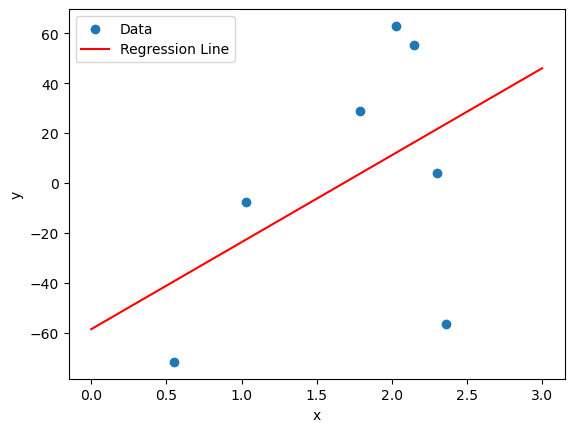

In [10]:
# find sum given an exponent
def findSum(exp, arrX, arrY=None):
    sum = 0
    if arrY is None:
        for i in arrX:
            sum += i**exp
    else:
        for i in range(0, len(arrX)):
            sum += (arrX[i] ** exp) * arrY[i]
    return sum


# find xi^n from 0 to 5 and find the sums of them
def buildSystem(arrX, arrY, n):
    # build the left side of the system
    for i in range(0, n + 1):
        for j in range(i, n + i + 1):
            leftHandSide[i][j - i] = findSum(j, arrX)
    # build the right side of the system
    for i in range(0, n + 1):
        rightHandSide[i][0] = findSum(i, arrX, arrY)


# build a system of equations and solve


# find a least squares polynomial for degree 1, 2, and 3
def rrPlot(x, y, n, leftHandSide, rightHandSide):
    # compute the left and right hand side equations
    buildSystem(x, y, n)
    # now that we have our system, we need to solve for a0 to a(n)
    sol = np.linalg.solve(leftHandSide, rightHandSide)

    # take our solution, turn it into a 1-D array to turn into a polynomial
    temp_y = np.zeros((n + 1))
    for i in range(len(sol)):
        temp_y[i] = sol[i][0]
    y_hat_temp = np.poly1d(temp_y)
    y_hat = np.polynomial.Polynomial(y_hat_temp)
    new_x = np.linspace(0, 3, 100)
    # now we need to find SSres, SSreg, and SStot for the new equation

    residuals = y - y_hat(x)
    SSres = np.sum((residuals) ** 2)
    y_mean = np.mean(y)
    SSreg = np.sum((y_hat(x) - y_mean) ** 2)
    SStot = SSres + SSreg
    rSquared = SSreg / SStot
    print(
        "SSres: "
        + str(SSres)
        + ", SSreg: "
        + str(SSreg)
        + ", SStot: "
        + str(SStot)
        + ", R^2: "
        + str(rSquared)
    )

    # plot the data
    plt.scatter(x, y, label="Data")
    plt.plot(new_x, y_hat(new_x), color="red", label="Regression Line")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()


x = np.array([0.55, 1.03, 1.79, 2.03, 2.15, 2.30, 2.36])
y = np.array([-71.79, -7.5, 28.89, 62.97, 55.43, 4.0, -56.67])
n = 1
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)

SSres: 5120.997085122419, SSreg: 11155.311114878526, SStot: 16276.308200000945, R^2: 0.6853710913926955


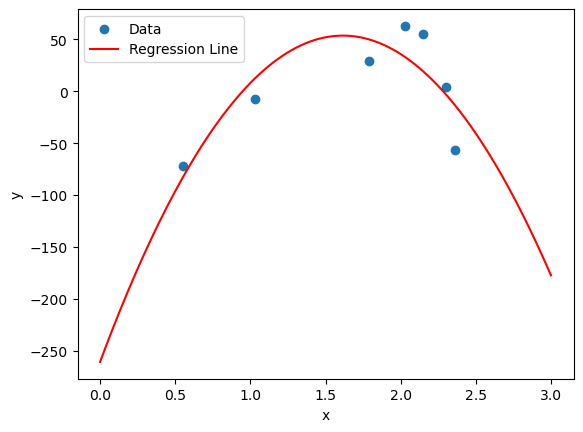

In [11]:
n = 2
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)

SSres: 3072.0069087124903, SSreg: 13204.301291287979, SStot: 16276.308200000469, R^2: 0.8112589863153119


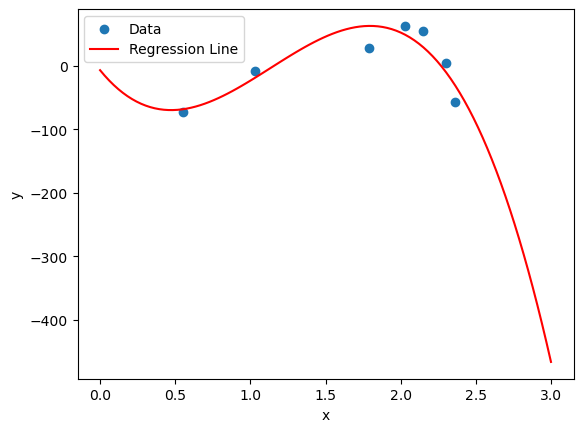

In [12]:
n = 3
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)

# Question 4 - Wilhelm Huper

In [13]:
x = np.array([4.0,4.2,4.5,4.7,5.1,5.5,5.9,6.3,6.8,7.1])
y = np.array([102.56,113.18,130.11,142.05,167.53,195.14,224.87,256.73,299.50,326.72])

In [14]:
def alpha(x, y):
    n = len(x)
    numerator = n * np.sum(x*y) - np.sum(x) * np.sum(y)
    denominator = n * np.sum(x**2) - (np.sum(x))**2
    return numerator / denominator
def beta(x, y):
    n = len(x)
    numerator = np.sum(y) - alpha(x,y) * np.sum(x)
    return numerator / n

In [15]:
y_log = np.log(y)
a = alpha(x, y_log)
b = np.exp(beta(x,y_log))
a, b

(0.3723817720659319, 24.258760258657155)

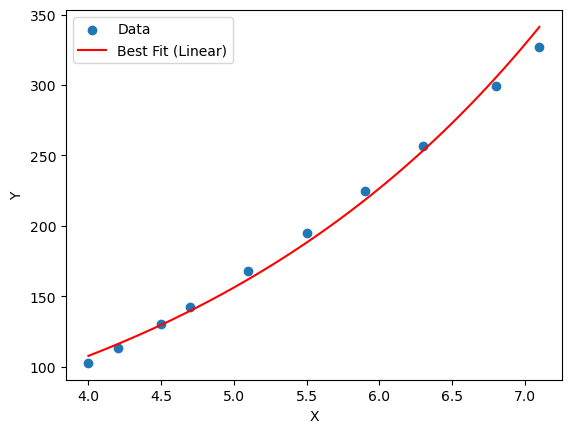

In [16]:
x_fit = np.linspace(min(x), max(x), 100)
y_fit = b * np.exp(a * x_fit)

plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, 'r', label='Best Fit (Linear)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()